In [19]:
import pandas as pd
import numpy as np
import statsmodels.tsa.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from scipy import special
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from itertools import combinations as combs
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [20]:
def normalize_arr(arr):
    mean = np.nanmean(arr)
    std = np.nanstd(arr)
    nrm = (arr-mean)/std
    return nrm
    
def yearly_avg_over_months(arr):
    n_yr = np.unique(arr[:,0])
    avg_val = np.zeros(len(n_yr))
    for i in range(len(n_yr)-1):
        avg_val[i] = np.nanmean(arr[i*12:(i+1)*12,2])
    return np.stack((n_yr,avg_val),axis = 1)

def arr_loc(arr,val):
    index = 0
    for i in range(len(arr)):
        index = i
        if int(arr[i]) == int(val):
            break
           
    return index

In [25]:
start_date = 1990
end_date = 2010

Seal_file = pd.read_excel('Pred_env_data/harbourseals_1970to2020.xlsx','harbourseals_1970to2020')
Whale_file = pd.read_excel('Pred_env_data/killerwhales_1970to2020.xlsx','killerwhales_1970to2020')
Pdo_file = pd.read_excel('Pred_env_data/pdo.xlsx','pdo')
zooplankton_file = pd.read_excel('Data/ZooPlanktonPerryData.xlsx','5. Salmon marine survivals')
Salinity_file = pd.read_excel('Pred_env_data/Entrance_island_salinity.xlsx')

Seal_data = Seal_file.loc[(Seal_file['year'] >= start_date) & (Seal_file['year'] <= end_date)]
Whale_data = Whale_file.loc[(Whale_file['Year'] >= start_date) & (Whale_file['Year'] <= end_date)]
Salinity_data = Salinity_file.loc[(Salinity_file['YEAR'] >= start_date) & (Salinity_file['YEAR'] <= end_date)]
Salmon_viability = zooplankton_file.loc[(zooplankton_file['Ocean Entry Year'] >= start_date) & (zooplankton_file['Ocean Entry Year'] <= end_date)]
Pdo_data = Pdo_file.loc[(Pdo_file['year'] >= start_date) & (Pdo_file['year'] <= end_date)]

In [26]:
print(PDO_data)


        date  year  month   pdo
1632  199001  1990      1 -0.42
1633  199002  1990      2 -1.28
1634  199003  1990      3 -1.24
1635  199004  1990      4 -0.15
1636  199005  1990      5 -0.32
...      ...   ...    ...   ...
1879  201008  2010      8 -2.21
1880  201009  2010      9 -2.45
1881  201010  2010     10 -1.60
1882  201011  2010     11 -1.57
1883  201012  2010     12 -2.04

[252 rows x 4 columns]


In [31]:
Seal_data_arr = Seal_data.to_numpy()
Whale_data_arr = Whale_data.to_numpy()

Pdo_data_arr = Pdo_data.to_numpy()
Pdo_data_arr_yearly = yearly_avg_over_months(Pdo_data_arr[:,1:])
Salinity_data_arr = Salinity_data.to_numpy()
Salinity_data_yrly = np.mean(Salinity_data_arr[:,1:],axis = 1)


Salmon_data_arr = Salmon_viability.to_numpy()
time_wd = np.arange(start_date,end_date+1,1,dtype = int)

In [34]:
#print(Salmon_data_arr)


In [35]:
Data_features_pred = np.stack((Seal_data_arr[:,1],Whale_data_arr[:,1]),axis = 1)
Data_features_env = np.stack((Pdo_data_arr_yearly[:,1],
                          Salinity_data_yrly),axis = 1)

scaler = StandardScaler()

Data_features_pred_nrm = scaler.fit_transform(Data_features_pred)
Data_features_env_nrm = scaler.fit_transform(Data_features_env)

Salmon_viab_yr = Salmon_data_arr[:,0]
Salmon_viab = Salmon_data_arr[:,1:]
Salmon_viab_logit = special.logit(Salmon_viab)
Salmon_viab_nrm = (Salmon_viab_logit-np.nanmean(Salmon_viab_logit,axis = 0))/np.nanstd(Salmon_viab_logit,axis = 0)

# Plotting environmental and predatory variables, Viability vs year

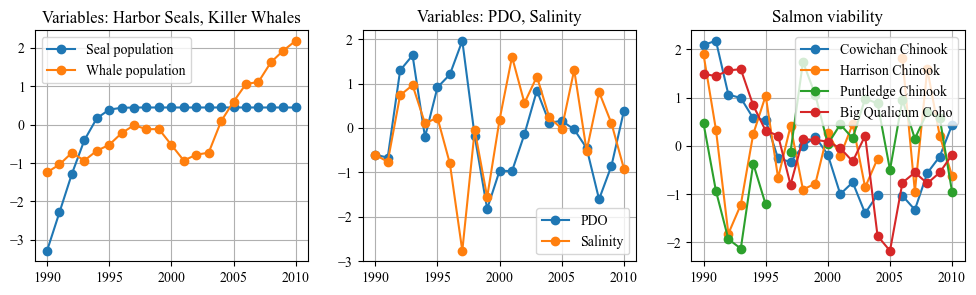

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,3))
#Plotting variables vs year
ax1.set_title("Variables: Harbor Seals, Killer Whales")
ax1.plot(time_wd,Data_features_pred_nrm[:,0],marker = "o",label = 'Seal population')
ax1.plot(time_wd,Data_features_pred_nrm[:,1],marker = "o",label = 'Whale population')
ax1.legend()
ax1.grid()

#Plotting variables vs year
ax2.set_title("Variables: PDO, Salinity")
ax2.plot(time_wd,Data_features_env_nrm[:,-2],marker = "o",label = 'PDO')
ax2.plot(time_wd,Data_features_env_nrm[:,-1],marker = "o",label = 'Salinity')
ax2.legend()
ax2.grid()

#Plotting salmon viability vs year
ax3.set_title("Salmon viability")
ax3.plot(time_wd,Salmon_viab_nrm[:,0],marker = "o",label = 'Cowichan Chinook')
ax3.plot(time_wd,Salmon_viab_nrm[:,1],marker = "o",label = 'Harrison Chinook')
ax3.plot(time_wd,Salmon_viab_nrm[:,2],marker = "o",label = 'Puntledge Chinook')
ax3.plot(time_wd,Salmon_viab_nrm[:,3],marker = "o",label = 'Big Qualicum Coho')
ax3.legend(loc = 'best')
ax3.grid()

# Viability vs PDO 

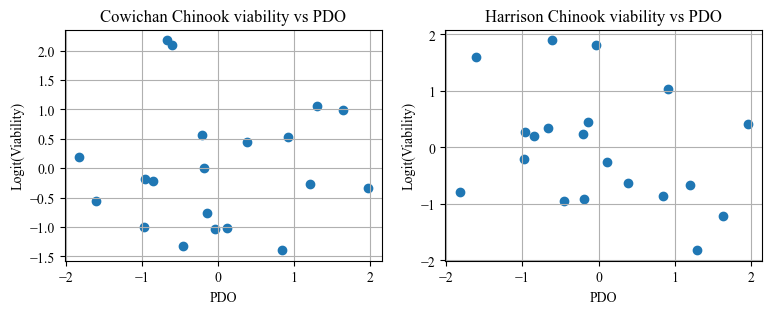

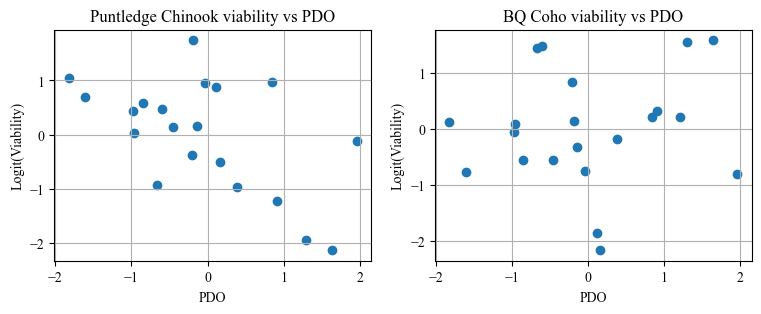

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (9,3))
ax1.set_title("Cowichan Chinook viability vs PDO")
ax1.scatter(Data_features_env_nrm[:,0],Salmon_viab_nrm[:,0])
ax1.set_ylabel("Logit(Viability)")
ax1.set_xlabel("PDO")
ax1.grid()

ax2.set_title("Harrison Chinook viability vs PDO")
ax2.scatter(Data_features_env_nrm[:,0],Salmon_viab_nrm[:,1])
ax2.set_ylabel("Logit(Viability)")
ax2.set_xlabel("PDO")
ax2.grid()

fig, (ax3,ax4) = plt.subplots(1,2,figsize = (9,3))
ax3.set_title("Puntledge Chinook viability vs PDO")
ax3.set_ylabel("Logit(Viability)")
ax3.scatter(Data_features_env_nrm[:,0],Salmon_viab_nrm[:,2])
ax3.set_xlabel("PDO")
ax3.grid()

ax4.set_title("BQ Coho viability vs PDO")
ax4.scatter(Data_features_env_nrm[:,0],Salmon_viab_nrm[:,3])
ax4.set_ylabel("Logit(Viability)")
ax4.set_xlabel("PDO")
ax4.grid()

# Viability vs Salinity

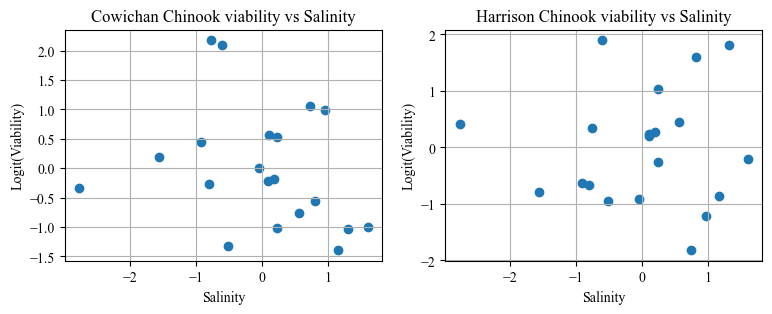

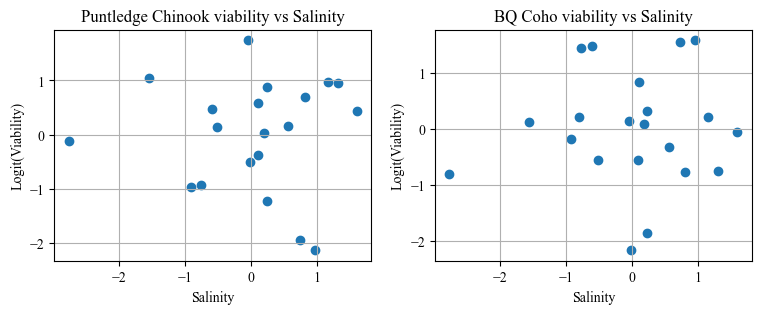

In [38]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (9,3))
ax1.set_title("Cowichan Chinook viability vs Salinity")
ax1.scatter(Data_features_env_nrm[:,1],Salmon_viab_nrm[:,0])
ax1.set_ylabel("Logit(Viability)")
ax1.set_xlabel("Salinity")
ax1.grid()

ax2.set_title("Harrison Chinook viability vs Salinity")
ax2.scatter(Data_features_env_nrm[:,1],Salmon_viab_nrm[:,1])
ax2.set_ylabel("Logit(Viability)")
ax2.set_xlabel("Salinity")
ax2.grid()

fig, (ax3,ax4) = plt.subplots(1,2,figsize = (9,3))
ax3.set_title("Puntledge Chinook viability vs Salinity")
ax3.scatter(Data_features_env_nrm[:,1],Salmon_viab_nrm[:,2])
ax3.set_ylabel("Logit(Viability)")
ax3.set_xlabel("Salinity")
ax3.grid()

ax4.set_title("BQ Coho viability vs Salinity")
ax4.scatter(Data_features_env_nrm[:,1],Salmon_viab_nrm[:,3])
ax4.set_ylabel("Logit(Viability)")
ax4.set_xlabel("Salinity")
ax4.grid()

# Viability vs Seal population

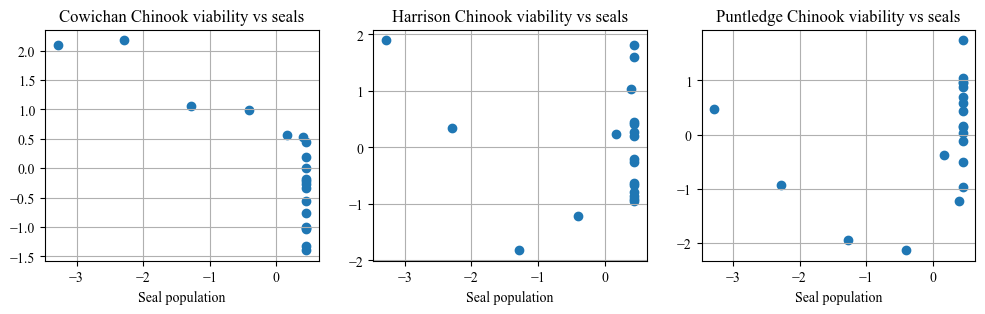

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,3))
ax1.set_title("Cowichan Chinook viability vs seals")
ax1.scatter(Data_features_pred_nrm[:,0],Salmon_viab_nrm[:,0])
ax1.set_xlabel("Seal population")
ax1.grid()

ax2.set_title("Harrison Chinook viability vs seals")
ax2.scatter(Data_features_pred_nrm[:,0],Salmon_viab_nrm[:,1])
ax2.set_xlabel("Seal population")
ax2.grid()

ax3.set_title("Puntledge Chinook viability vs seals")
ax3.scatter(Data_features_pred_nrm[:,0],Salmon_viab_nrm[:,2])
ax3.set_xlabel("Seal population")
ax3.grid()

# Killer Whale population vs Salmon viability

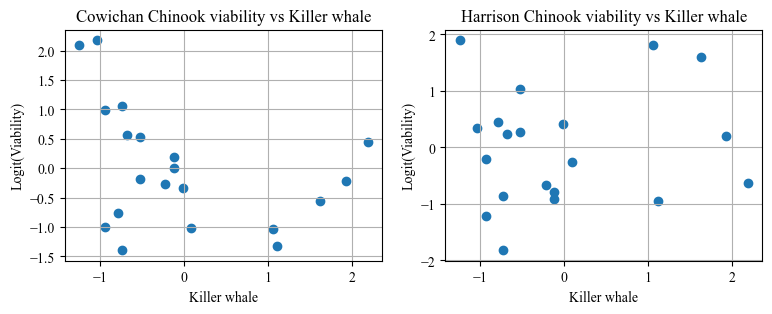

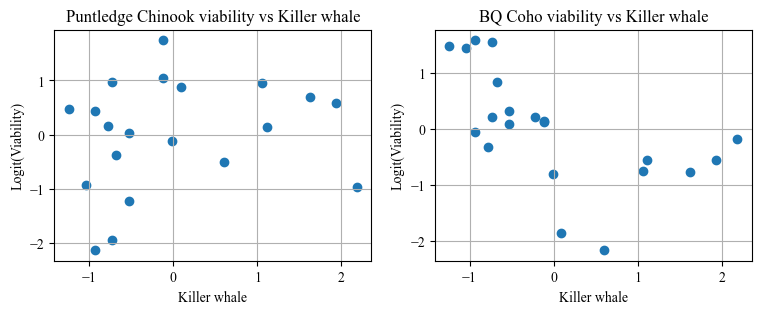

In [40]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (9,3))
ax1.set_title("Cowichan Chinook viability vs Killer whale")
ax1.scatter(Data_features_pred_nrm[:,1],Salmon_viab_nrm[:,0])
ax1.set_ylabel("Logit(Viability)")
ax1.set_xlabel("Killer whale")
ax1.grid()

ax2.set_title("Harrison Chinook viability vs Killer whale")
ax2.scatter(Data_features_pred_nrm[:,1],Salmon_viab_nrm[:,1])
ax2.set_ylabel("Logit(Viability)")
ax2.set_xlabel("Killer whale")
ax2.grid()

fig, (ax3,ax4) = plt.subplots(1,2,figsize = (9,3))
ax3.set_title("Puntledge Chinook viability vs Killer whale")
ax3.scatter(Data_features_pred_nrm[:,1],Salmon_viab_nrm[:,2])
ax3.set_ylabel("Logit(Viability)")
ax3.set_xlabel("Killer whale")
ax3.grid()

ax4.set_title("BQ Coho viability vs Killer whale")
ax4.scatter(Data_features_pred_nrm[:,1],Salmon_viab_nrm[:,3])
ax4.set_ylabel("Logit(Viability)")
ax4.set_xlabel("Killer whale")
ax4.grid()

# Interspecies competition 

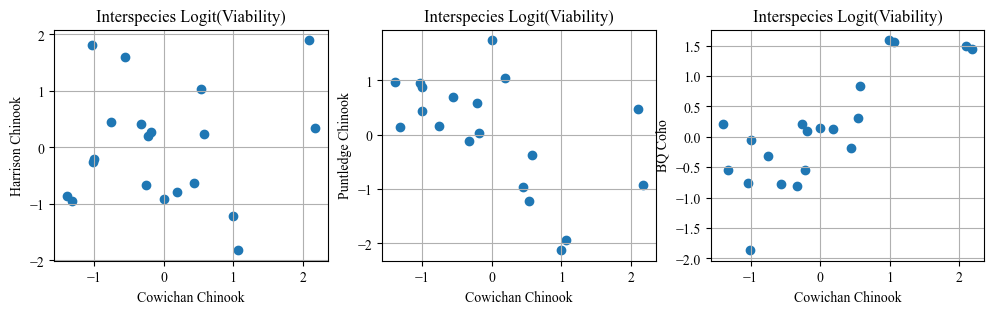

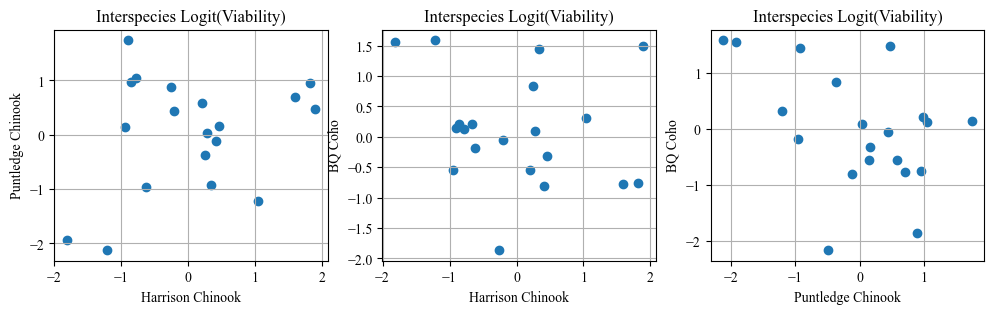

In [47]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,3))
ax1.set_title("Interspecies Logit(Viability)")
ax1.scatter(Salmon_viab_nrm[:,0],Salmon_viab_nrm[:,1])
ax1.set_ylabel("Harrison Chinook")
ax1.set_xlabel("Cowichan Chinook")
ax1.grid()

ax2.set_title("Interspecies Logit(Viability)")
ax2.scatter(Salmon_viab_nrm[:,0],Salmon_viab_nrm[:,2])
ax2.set_ylabel("Puntledge Chinook")
ax2.set_xlabel("Cowichan Chinook")
ax2.grid()

ax3.set_title("Interspecies Logit(Viability)")
ax3.scatter(Salmon_viab_nrm[:,0],Salmon_viab_nrm[:,3])
ax3.set_ylabel("BQ Coho")
ax3.set_xlabel("Cowichan Chinook")
ax3.grid()

fig, (ax4,ax5,ax6) = plt.subplots(1,3,figsize = (12,3))
ax4.set_title("Interspecies Logit(Viability)")
ax4.scatter(Salmon_viab_nrm[:,1],Salmon_viab_nrm[:,2])
ax4.set_ylabel("Puntledge Chinook")
ax4.set_xlabel("Harrison Chinook")
ax4.grid()

ax5.set_title("Interspecies Logit(Viability)")
ax5.scatter(Salmon_viab_nrm[:,1],Salmon_viab_nrm[:,3])
ax5.set_ylabel("BQ Coho")
ax5.set_xlabel("Harrison Chinook")
ax5.grid()

ax6.set_title("Interspecies Logit(Viability)")
ax6.scatter(Salmon_viab_nrm[:,2],Salmon_viab_nrm[:,3])
ax6.set_ylabel("BQ Coho")
ax6.set_xlabel("Puntledge Chinook")
ax6.grid()